### Getting the data

In [71]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [72]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [73]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

the DESCR key describes the dataset

the data key contains an array with one row per instance and one column per feature

the target key contains an array with the labels

In [74]:
mnist['target']

array([0., 0., 0., ..., 9., 9., 9.])

In [75]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [76]:
y.shape

(70000,)

there are 70,000 images and each image has 784 features. Each image is 28x28 pixels, and each feature simply represents one pixel's intensity from 0(white) to 255(black).

to view an image, need to grab the feature vector, reshape it to 28x28 array, and then plot using matplotlib's imshow()

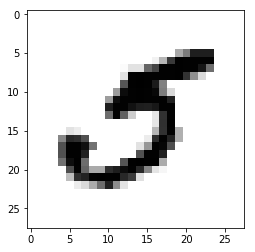

In [77]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

In [78]:
# verifing with the label for 36000th instance
y[36000]

5.0

In [79]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

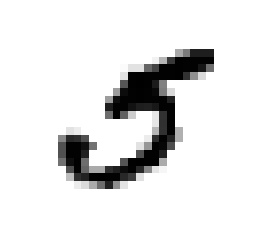

In [80]:
plot_digit(some_digit)

#### Train and Test set
MNISt datasets are already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [81]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffling the training set, as this will guarantee that all cross-validation folds will be similar. Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the datasets ensures that this doesn't happen.

In [82]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier
let's try to identify only one digit for now - for example the number 5.

This "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes 5, and not-5.

In [83]:
# creating the target vectors for this classification task
y_train_5 = (y_train == 5) # True for all 5s, false otherwise
y_test_5 = (y_test == 5)

In [84]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [85]:
sgd_clf.predict([some_digit])

array([ True])

the classifier guesses that this image is 5 (a True case) which is what this instance's label says.

In [86]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, scoring="accuracy", cv=3)

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

array([0.96085, 0.9687 , 0.94985])

above 95% accuracy on all cross-validation folds!

let's look at a very dumb classifier that just classifies every single image in the "not-5" class

In [87]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [88]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90925, 0.90925, 0.91045])

over 90% accuracy! This is simply because only about 10% of the images are 5s, so if we always guess that an image is not a 5, we'll be right about it 90% of the time. 

This is why accuracy is generally not the preferred performance measure for classifiers, especially when we're dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### Confusion Matrix
a better way to evaluate the performace of a classifier is to look at the confusion matrix. 

The general idea is to count the number of times instances of class A are classified as class B. To compute the confusion matrix, we first need to have a set of predictions, so they can be compared to the actual targets. We could make predictions on the test set, but its better kept untouched for now (we'll touch the test set only at the very end of the project when the classifier is ready to launch). Instead, we'll use the cross_val_predict() function of sklearn:

In [89]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53100,  1479],
       [  933,  4488]], dtype=int64)

##### a lil intro on Confusion Matrix:
each row in a confusion matrix represents an 'actual class', while each column in a confusion matrix represents a 'predicted class'.

|              | predicted_class | predicted_class |
|--------------|-----------------|-----------------|
| actual_class | true -ve        | false +ve       |
| actual_class | false -ve       | true +ve        |


|                                  | predicted_class (negative case)                          | predicted_class (positive case)                  |
|----------------------------------|---------------------------------------------------------|-------------------------------------------------|
| actual_class (the negative case) | the non-5 images that were correctly classified         | the non-5 images that were wrongly classified   |
| actual_class (the positive case) | the images of 5s that were wrongly classified as non-5s | the images of 5s that were correctly classified |


A perfect classifier would have only true positives and true negatives, so its confusion matrix would have non-zero values only on its main diagonal (top left to bottom right)

say for example,
    
|   |                   |             |
|---|-------------------|-------------|
|   | array( [ [ 54579, |     0 ],    |
|   |          [    0,  |  5421 ] ] ) |


### Precision:
The confusion matrix gives a lot of information, but sometimes its better to look for a more concise metric. An interesting one to look at is the **'accuracy'** of the positive predictions, this is called as the **Precision ** of the classifier.

**precision = $\frac{TP}{TP+FP}$**

TP is the true positives and FP is the false positives.

### Recall:
The trivial way to have a perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named **Recall**, also called as **'sensitivity'** or **'true positive rate (TPR)'**: this is the ratio of positive instances that are correctly detected by the classifier

**recall = $\frac{TP}{TP+FN}$**

FN is the number of false negatives.

In [91]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7521367521367521

In [92]:
recall_score(y_train_5, y_train_pred)

0.8278915329275042

_this basically means, when the classifier claims an image represents a 5, it is correct only 75% of the time. Moreover, it only detects 82% of the 5s._

### $F_{1}$ score:
This is where the _$F_{1}$ score_ comes in. It is often convenient to combine precision and recall into a single metric called the _F1 score_, in particular if we ever need asimple way to compare any the two classifiers. The F1 score is the _harmonic mean_ of precision and recall. While the regular mean treats all values equally, the _harmonic mean_ gives much more weight to low values. As a result, the classifier will only get a high F1 score, if both recall and precision are high.

$F_{1}$ = $\frac{2}{(\frac{1}{precision}+ \frac{1}{recall})}$ = $ 2 \times \frac{precision \times recall}{precision + recall}$ = $\frac{TP}{TP + \frac{FN + FP}{2}}$

In [93]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7881981032665965

### Precision / Recall Tradeoff:
_increasing precision reduces recall and vice-versa. This is called the precision/recall tradeoff._

To understand this tradeoff its important to understand how SGDClassifier makes its classification decisions. For each instance, it computes a score based on a _decision function_, and if the score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

Now Scikit-learn doesn't allow you to set the threshold directly, but it does gives you an access to the decision scores that it uses to make the predictions. So instead of calling the classifier's _predict()_ method, we'll call the <i>decision_function()</i> method, which returns a score for each instance, and then make predictions based on those scores using any threshold we want:

In [94]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([146083.94736023])

In [95]:
threshold = 0

In [96]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

so here the SGDClassifier uses a thresold equal to 0, so the previous code returns the same result as predict() method (i.e. True). Now time to check, upon raising the threshold

In [97]:
threshold = 200000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

this confirms that raising the threshold decreases the recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses is when the threshold is increased to 200000.

Now how to decide which threshold to use? For this we'll first need to get all the scores for all the instances in the training set using the <i>cross_val_predict()</i> function again, but this time specifying that we want it to return decision scores instead of predictions:

In [98]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

now with these scores, we'll compute the precision and recall for all the possible thresholds using the <i>precision_recall_curve()</i> function, for all the instances in the training set:

Note: there is an [issue #9589](https://github.com/scikit-learn/scikit-learn/issues/9589) introduced in Scikit-Learn 0.19.0 where the result of cross_val_predict() is incorrect in the binary classification case when using method="decision_function", as in the code above. The resulting array has an extra first dimension full of 0s. We need to add this small hack for now to work around this issue:

In [99]:
y_scores.shape

(60000,)

In [100]:
# a hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

y_scores.shape

(60000,)

In [101]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

finally, we'll now plot precision and recall as functions of the threshold values:

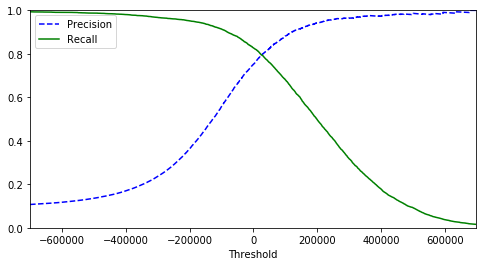

In [102]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

Now one can simply select the threshold value that gives the best precision/recall tradeoff for his task. Let's assume our goal is to aim for atleast 90% precision. So looking at the above plot, lets use a theshold value of above 70,000. Now to make the predictions, we won't use the classifier's predict() method, instead we'll check their precision and recall score:

In [103]:
from sklearn.metrics import precision_score, recall_score

y_train_90 = (y_scores > 70000)

precision_score(y_train_5, y_train_90)

0.8486277873070326

In [104]:
recall_score(y_train_5, y_train_90)

0.730123593432946

Another way to select a good precision/recall tradeoff is to plot precision directly against recall:

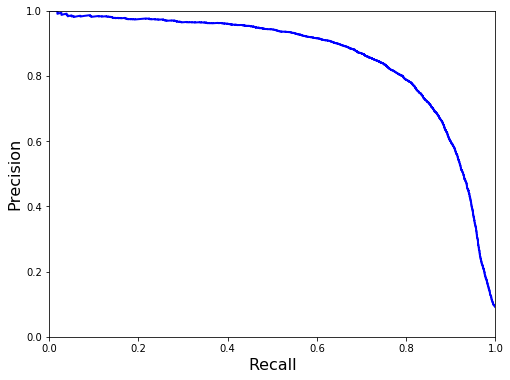

In [105]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC Curves
The _Receiver Operating Characteristics (ROC)_ curve is another common tool used with binary classifiers. Its very similar to precision/recall curve, the ROC curve plots the _true positive rate_ (another name for recall) against the _false positive rate_. The FPR is the ratio of negative instances that were incorrectly classified as positive. It is equal to one minus the _true negative rate_, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called _specificity_. Hence the ROC curve plots _sensitivity (recall)_ versus <i>1 - specificity</i>.

To plot ROC curve, we first need to compute the TPR and FPR for various threshold values, using the <i>roc_curve()</i> function:

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

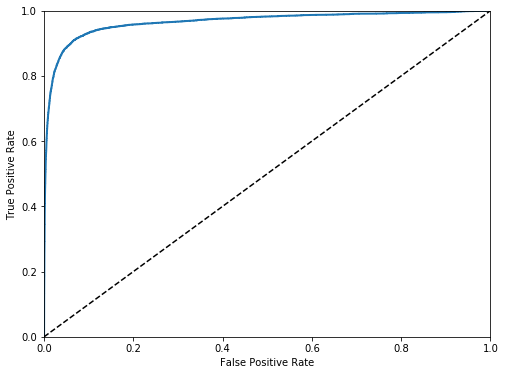

In [107]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

once again there is a tradeoff: the higher the recall(TPR), the more false positives(FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from this line as possible (towards top-left corner).

One way to compare classifiers is to measure the _area under the curve (AUC)_. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have ROC AUC equal to 0.5

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9656132891909796

In [109]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

# instead of decision_function() method RandomForestClassifier has predict_proba() method.
# The predict_proba() method returns an array containing a row per instance and a column per class,
# each containing the probability that the given instance belongs to the given class

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

but to plot ROC curve, we need scores and not probabilities. A simple solution would be to use the positive class's probability as the score:

In [110]:
y_scores_forest = y_probas_forest[:,-1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

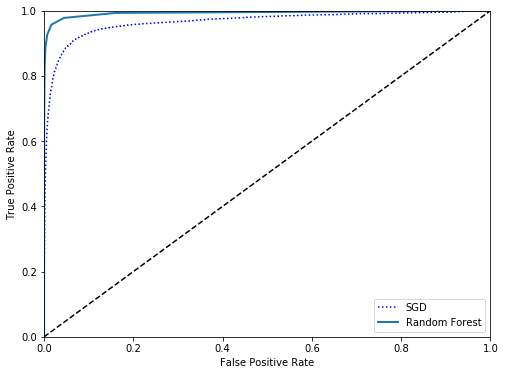

In [111]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [112]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928743930089219

In [113]:
# checking the precision and recall scores as well
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9838568935427574

In [114]:
recall_score(y_train_5, y_train_pred_forest)

0.8319498247555801

98% precision and 83% recall. Not that bad!

### Multiclass Classification:

In [115]:
sgd_clf.fit(X_train, y_train)  # y_train and not y_train_5
sgd_clf.predict([some_digit])

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [116]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -62514.55439379, -382129.48885586, -269685.3525733 ,
        -167835.48406618, -479736.13569608,  146083.94736023,
        -652816.2363087 , -178424.82391388, -778213.62034462,
        -560733.13195802]])

the highest score is indeed the one corresponding to digit 5

In [117]:
np.argmax(some_digit_scores)

5

In [118]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

when a classifier is trained, it stores the list of target classes in its <i>classes_</i> attribute, ordered by value.

In [119]:
sgd_clf.classes_[5]

5.0

if at any point we want to force scikit learn to use one-versus-one or one-versus-all, we can use the _OneVsOneClassifier_ or _OneVsRestClassifier_ classes. We simply need to create an instance and pass a binary classifier to its constructor. For example:

In [120]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

array([5.])

In [121]:
len(ovo_clf.estimators_)

45

In [122]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

this time scikit learn did not run OvA or OvO because Random Forest classifiers can directly classify instances into multiple classes. To check this let's call the <i>predict_proba()</i> to get the list of probabilities that the classifier assigned to each instance of each class:

In [123]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [124]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

array([0.84323135, 0.86934347, 0.8646797 ])

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

array([0.90876825, 0.91044552, 0.90918638])

### Error Analysis:

In [126]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\venvs\mnist\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\my_work\pycharm\v

In [127]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5727,    2,   20,    7,   11,   51,   52,    7,   43,    3],
       [   2, 6469,   45,   22,    6,   43,    8,   13,  122,   12],
       [  52,   34, 5323,   93,   73,   28,  101,   67,  171,   16],
       [  52,   39,  137, 5302,    3,  268,   37,   55,  141,   97],
       [  19,   29,   36,    8, 5348,   10,   57,   33,   96,  206],
       [  70,   33,   30,  170,   74, 4640,  114,   27,  175,   88],
       [  34,   23,   47,    2,   40,  100, 5622,    6,   44,    0],
       [  26,   17,   59,   28,   52,   11,    7, 5796,   18,  251],
       [  50,  148,   68,  143,   15,  160,   57,   29, 5034,  147],
       [  42,   27,   24,   83,  149,   37,    3,  193,   84, 5307]],
      dtype=int64)

it's often more convenient to look at an image representation of the confusion matrix, using Matplotlib's matshow() function:

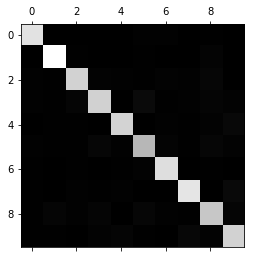

In [128]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

this confusion matrix looks fairly good, since most of the images are on the main diagonal, which means that they were classified correctly. 

The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on the other digits. Let's focus the plot on errors. First, let's divide each value in the confusion matrix by the number of images in the corresponding class, so we can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad):

In [129]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [130]:
norm_conf_mx = conf_mx / row_sums

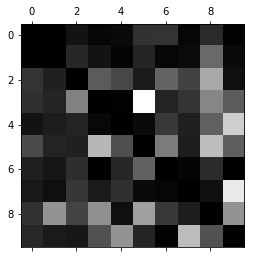

In [131]:
# now let's fill the diagonals with zeros to keep onl the errors, and later plot the result
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

this clearly shows the kinds of erros the classifier makes. Its important to remember here that the rows represtnts the actual classes, while the columns reprents the predicted classes. The columns for classes 8 and 9 are quite bright, which tells us that many images get misclassified as 8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling us that 8s and 9s are often confused with other digits. Conversely, some rows are pretty dark, such as row 1: this means that most of the 1s are classified correctly (a few are confused with 8s but that's about it).

### Multilabel Classification:

In [132]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [133]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [135]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [136]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.9681413595998869

### Multioutput Classification:

In [137]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

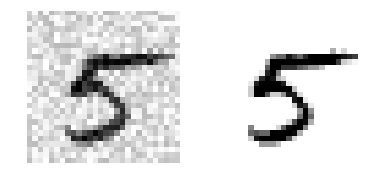

In [138]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

on the left is the noisy image, and on the right is the clean target image. Now to train the classifier and make it clean this image:

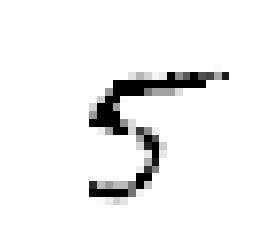

In [139]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)